In [1]:
%reload_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.WARNING)

# Skills-ML Tour

Skills-ML is an open source software library for applying NLP and ML to labor market data. It allows the user to perform tasks like skill extraction and occupation classification to collections of documents such as job postings, profiles, and course descriptions.

## Competency

A competency is any expertise or talent that is useful for a job. Developed capacities (e.g. active listening), proficiency with tools or technology (e.g. lancets, Microsoft Word), innate abilities (e.g. originality), and academic knowledge (e.g. medicine) are all considered competencies.

In [2]:
from skills_ml.ontologies import Competency

dinosaur_riding = Competency(
    identifier='dino_riding',
    name='Dinosaur Riding',
    description='Using the back of a dinosaur for transportation'
)

### Competency Relationships

Competencies are often related to each other. Defining parent-child relationships is a standard building block of existing competency frameworks like ONET and ESCO. A parent-child relationship generally implies that the child is a "type of" the parent.

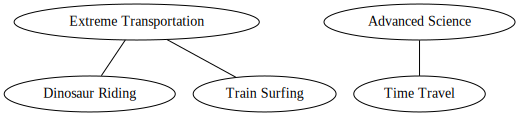

In [3]:
from skills_ml.ontologies import Competency
from skills_ml.ontologies.viz import display_nodes

dinosaur_riding = Competency(
    identifier='12345',
    name='Dinosaur Riding',
    description='Using the back of a dinosaur for transportation'
)

train_surfing = Competency(
    identifier='12346',
    name='Train Surfing',
    description='Standing on the train while it goes'
)

time_travel = Competency(
    identifier='23456',
    name='Time Travel',
    description='Traveling Through Time'
)

advanced_science = Competency(
    identifier='2345',
    name='Advanced Science',
)

extreme_transportation = Competency(
    identifier='123',
    name='Extreme Transportation',
    description='Comically dangerous forms of transportation'
)
time_travel.add_parent(advanced_science)
dinosaur_riding.add_parent(extreme_transportation)
train_surfing.add_parent(extreme_transportation)
display_nodes([dinosaur_riding, train_surfing, extreme_transportation, time_travel, advanced_science])

## Occupation

An occupation is a job or profession that a person can hold. Similar to competencies, these are also often defined hierarchically.


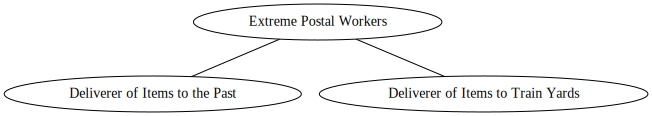

In [4]:
from skills_ml.ontologies import Occupation

extreme_postal_workers = Occupation(identifier='999', name='Extreme Postal Workers')
dino_postal_worker = Occupation(identifier='9998', name='Deliverer of Items to the Past')
train_yard_postal_worker = Occupation(identifier='9999', name='Deliverer of Items to Train Yards')
dino_postal_worker.add_parent(extreme_postal_workers)
train_yard_postal_worker.add_parent(extreme_postal_workers)

display_nodes([extreme_postal_workers, dino_postal_worker, train_yard_postal_worker])

# CompetencyOntology

A CompetencyOntology is a model of the labor market, or some subset thereof, consisting of a collection of competencies, a collection of occupations, and all of the relationships between them.

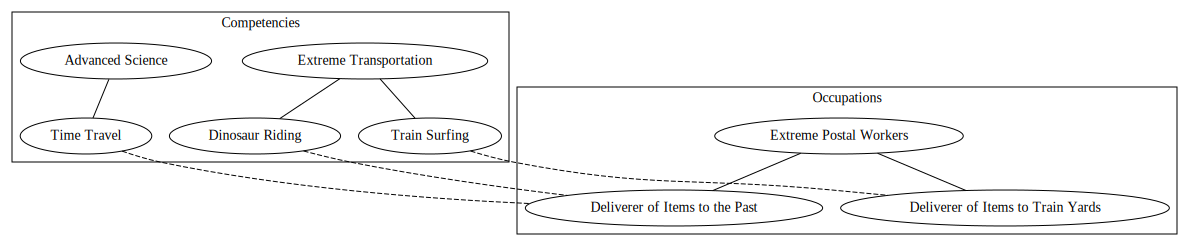

In [5]:
from skills_ml.ontologies import CompetencyOntology
from skills_ml.ontologies.viz import display_ontology

ontology = CompetencyOntology()
ontology.add_competency(dinosaur_riding)
ontology.add_competency(train_surfing)
ontology.add_competency(extreme_transportation)
ontology.add_competency(time_travel)
ontology.add_competency(advanced_science)

ontology.add_occupation(dino_postal_worker)
ontology.add_occupation(train_yard_postal_worker)
ontology.add_occupation(extreme_postal_workers)

ontology.add_edge(occupation=dino_postal_worker, competency=dinosaur_riding)
ontology.add_edge(occupation=dino_postal_worker, competency=time_travel)
ontology.add_edge(occupation=train_yard_postal_worker, competency=train_surfing)

display_ontology(ontology)

## Prebuilt Ontologies

To move on we'll want to level up to a full ontology. The example we'll use is O\*NET, built from survey data and maintained by the US Department of Labor. A CompetencyOntology subclass that downloads the source files from the O\*NET web site is included in Skills-ML.

In [6]:
from skills_ml.ontologies.onet import Onet
onet = Onet()
onet.print_summary_stats()

Ontology summary statistics for onet
Num competencies: 32030
Num occupations: 1133
Num competency-occupation edges: 107305
Median occupations per competency: 1
Median competencies per occupation: 89
Mean occupations per competency: 3.350245090386837
Mean competencies per occupation: 94.70873786407768


In [7]:
list(onet.competencies)[0:5]

[Competency(identifier=41104007-Water sampling pumps, name=Water sampling pumps, categories=['Tools', 'O*NET T2'], {}),
 Competency(identifier=43232502-Distance learning software, name=Distance learning software, categories=['Technology', 'O*NET T2'], {}),
 Competency(identifier=46181509-Chemical-resistant suits, name=Chemical-resistant suits, categories=['Tools', 'O*NET T2'], {}),
 Competency(identifier=43231603-Avalara AvaTax ST, name=Avalara AvaTax ST, categories=['Technology', 'O*NET T2'], {}),
 Competency(identifier=43232603-Mainsaver Asset Management, name=Mainsaver Asset Management, categories=['Technology', 'O*NET T2'], {})]

### Filtering

~34000 competencies and ~1100 occupations is a lot. Let's explore the filtering functionality of the CompetencyOntology to zoom in on a more specific slice.

`filter_by` filters using edges: the filtering function it expects takes in an edge (between a Competency and Occupation) and returns whether or not it should be in the result. The result takes the form of a new CompetencyOntology, so you can interact with it in the same way as you would the source ontology. 

In [8]:
nurse_practitioners = onet.filter_by(lambda edge: 'Nurse Practitioners' in edge.occupation.name)
nurse_practitioners.competencies

{Competency(identifier=1.A.1.a.1, name=Oral Comprehension, categories=['Abilities'], {'competencyText': 'The ability to listen to and understand information and ideas presented through spoken words and sentences.'}),
 Competency(identifier=1.A.1.a.2, name=Written Comprehension, categories=['Abilities'], {'competencyText': 'The ability to read and understand information and ideas presented in writing.'}),
 Competency(identifier=1.A.1.a.3, name=Oral Expression, categories=['Abilities'], {'competencyText': 'The ability to communicate information and ideas in speaking so others will understand.'}),
 Competency(identifier=1.A.1.a.4, name=Written Expression, categories=['Abilities'], {'competencyText': 'The ability to communicate information and ideas in writing so others will understand.'}),
 Competency(identifier=1.A.1.b.1, name=Fluency of Ideas, categories=['Abilities'], {'competencyText': 'The ability to come up with a number of ideas about a topic (the number of ideas is important, not 

That's a big list of competencies. Each competency has a list of categories, so let's get all of the different possible categories

In [9]:
set(cat for competency in nurse_practitioners.competencies for cat in competency.categories)

{'Abilities', 'Knowledge', 'O*NET T2', 'Skills', 'Technology', 'Tools'}

So we can ask questions like: what type of Knowledge do nurse practitioners need?

In [10]:
[competency for competency in nurse_practitioners.competencies if 'Knowledge' in competency.categories]

[Competency(identifier=2.C.6, name=Education and Training, categories=['Knowledge'], {'competencyText': 'Knowledge of principles and methods for curriculum and training design, teaching and instruction for individuals and groups, and the measurement of training effects.'}),
 Competency(identifier=2.C.7.e, name=Philosophy and Theology, categories=['Knowledge'], {'competencyText': 'Knowledge of different philosophical systems and religions. This includes their basic principles, values, ethics, ways of thinking, customs, practices, and their impact on human culture.'}),
 Competency(identifier=2.C.4.e, name=Psychology, categories=['Knowledge'], {'competencyText': 'Knowledge of human behavior and performance; individual differences in ability, personality, and interests; learning and motivation; psychological research methods; and the assessment and treatment of behavioral and affective disorders.'}),
 Competency(identifier=2.C.1.e, name=Customer and Personal Service, categories=['Knowledge

There are many other questions we can ask of just an ontology, but the real value will come from combining the knowledge contained in the ontology with larger unstructured datasets. In this next section we will explore how Skills-ML helps the user deal with such datasets as job postings, profiles, or course descriptions.

# Spirit of Skills-ML

- **Dataflow Programming**: `Skills-ML`'s design philosophy builds on dataflow programming or so called data streaming to process very large datasets (larger than RAM; potentially infinite). 
- **One-pass algorithm**: Data points are processed one at a time.
- **Lazy evaluation**: an evaluation strategy which delays the evaluation of an expression until its value is needed. In `Skills-ML`, most of the classes and functions here incorporates the concept of `Iterable` or `Generator`. We build the expression first and evaluate later. 

# Creating Dataset

Before we do anything with the context, we need dataset. `Skills-ML` makes use of schema.org’s JobPosting standard. As it has been in use for a long time, some open sources are already using this standard, which is easy to import. Other job posting data sources are converted into the schema.org Schema and all work on job postings is done using this standard schema. 

In `Skills-ML`, `job_postings` module has all the functionalities to create the data we need for later usage. 

## Common Schema

We have an useful function to help create the data generator from s3. 

- `JobPostingCollectionFromS3`: Stream job posting from s3.
- `JobPostingCollectionSample`: Stream a finite number of job postings stored within the library.

However, we are not restrcted to just JobPosting data. One can easily create whatever data generator such as `ProfileGenerator` or `CourseGenerator`. 

For example, we want to use the Vrigina Dataset which is an open data set of job postings. We just have to create a job posting generator with some transformation. 

In [11]:
from skills_ml.job_postings.raw.virginia import VirginiaTransformer
from urllib.request import urlopen
import json

va_url = "http://opendata.cs.vt.edu/dataset/ab0abac3-2293-4c9d-8d80-22d450254389/resource/074f7e44-9275-4bba-874e-4795e8f6830c/download/openjobs-jobpostings.may-2016.json"

class VAJobposting(object):
    def __init__(self, uri):
        self.uri = uri
    
    def __iter__(self):
        request = urlopen(self.uri)
        for line in request.readlines():
            raw = json.loads(line)
            yield VirginiaTransformer(partner_id="va")._transform(raw)
            

jobpostings_va = VAJobposting(va_url)

In [12]:
print(len(list(jobpostings_va)))

40098


## Filtering

To create a good dataset, we might want to have some criteria for choosing the proper job posting based on the task we want to perform, like job postings that have the label information, job postings that belong to certain occupation, or job postings that have rich enough information in the description field.

- `JobPostingFilterer`: Filter common schema job postings through a number of filtering functions.

This function also follows lazy evaluation strategy.

In [13]:
from skills_ml.job_postings.filtering import JobPostingFilterer

def is_tech_jobs(job):
    if job['onet_soc_code'][:2] in ['15', '17', '19']:
        return True
    else:
        return False
    
tech_jobs = JobPostingFilterer(
    job_posting_generator=VAJobposting(va_url), 
    filter_funcs=[is_tech_jobs]
)

In [14]:
from skills_ml.ontologies.onet import majorgroupname
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="darkgrid", font_scale=2)
%matplotlib inline

# major group distribution plotting function

def plot_major_group_distribution(job_postings):
    c = Counter()
    for job in job_postings:
        c.update([job['onet_soc_code'][:2]])
    s = pd.Series(c).sort_index()
    s.index = s.index.map(majorgroupname)
    ax = s.plot.bar(figsize=(20,10),rot=90)
    ax.set_xlabel('soc_major_group')
    ax.set_ylabel('number of job posting')
    ax.set_title(f"total number: {s.sum()}")
    return s

Computer and Mathematical             5065
Architecture and Engineering          1937
Life, Physical, and Social Science     192
dtype: int64

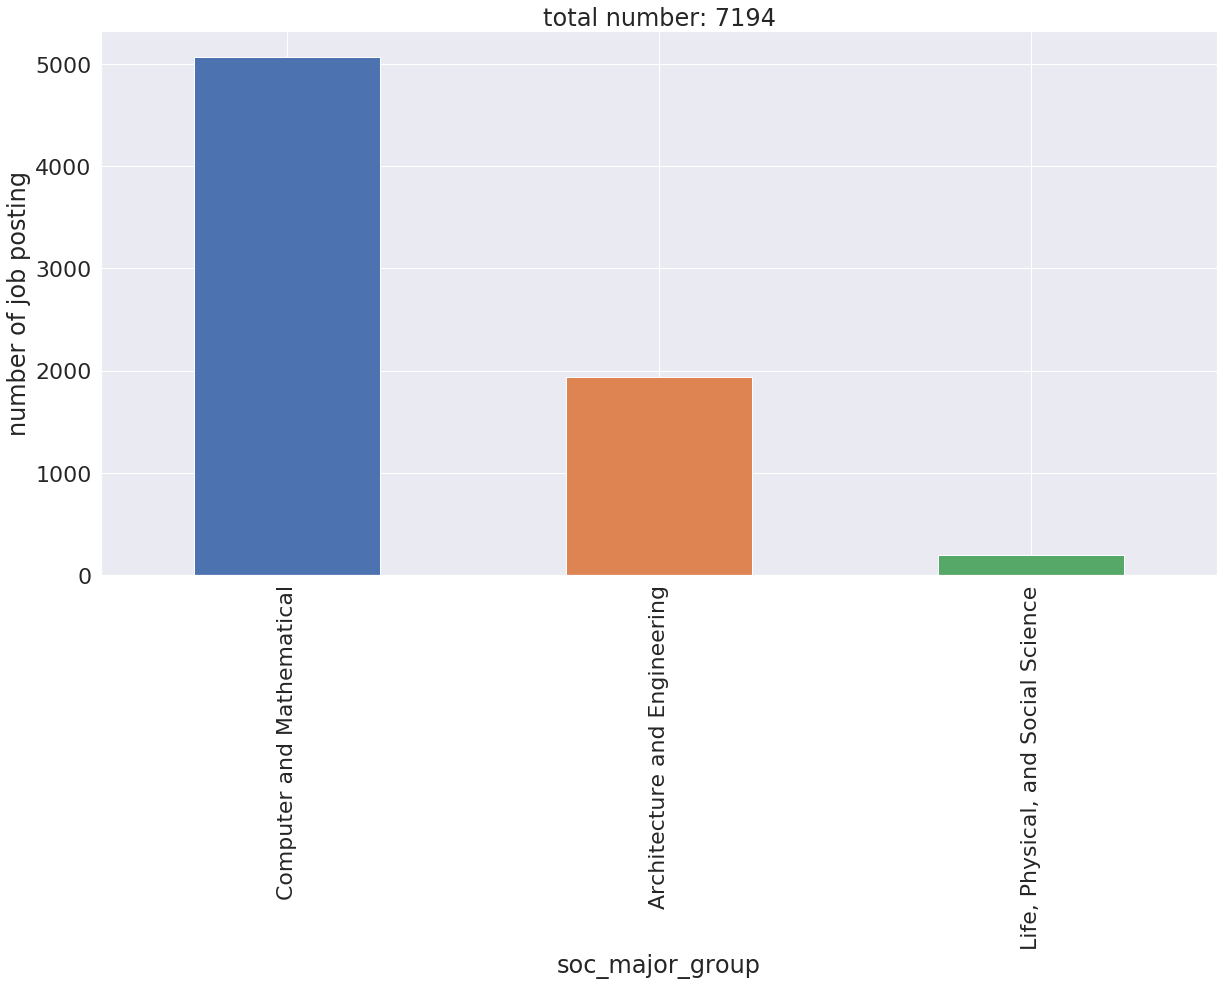

In [15]:
plot_major_group_distribution(tech_jobs)

What if we want to make sure that all the job postings have ONet SOC Code and it's not unknown(first 2 digit 99)? We can define filter functions like these which can be either generic function or lambda function.

In [16]:
def filter_onet_soc_code(job):
    if job['onet_soc_code'] and job['onet_soc_code'][:2] != '99':
        return True
    else:
        return False

has_soc = lambda x: x['onet_soc_code']
not_unknown_soc = lambda x: x['onet_soc_code'][:2] != '99'

In [17]:
jobpostings_filtered = JobPostingFilterer(
    job_posting_generator=VAJobposting(va_url), 
    filter_funcs=[has_soc, not_unknown_soc]
)

Management                                        6506
Business and Financial Operations                 3867
Computer and Mathematical                         5065
Architecture and Engineering                      1937
Life, Physical, and Social Science                 192
Community and Social Service                       282
Legal                                               94
Education, Training, and Library                   679
Arts, Design, Entertainment, Sports, and Media     598
Healthcare Practitioners and Technical            3447
Healthcare Support                                 494
Protective Service                                 484
Food Preparation and Serving Related               792
Building and Grounds Cleaning and Maintenance      189
Personal Care and Service                           97
Sales and Related                                 1415
Office and Administrative Support                 2580
Construction and Extraction                        196
Installati

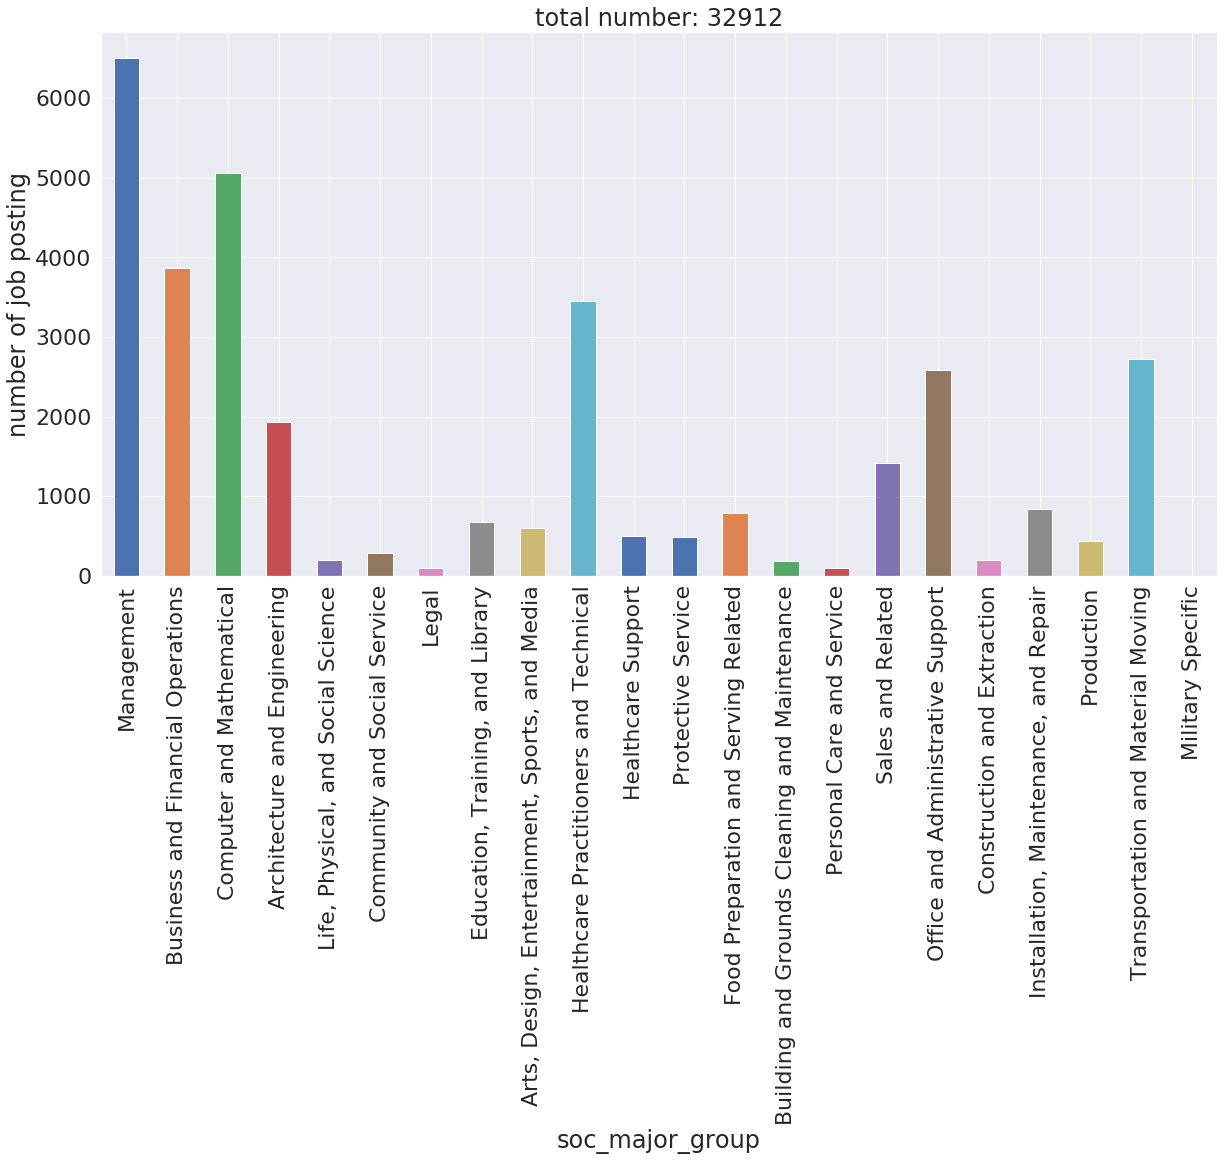

In [18]:
plot_major_group_distribution(jobpostings_filtered)

## Random Sampling

Even though we have a lot of data, most of time we don't need all of them to do the analysis. Or we can't even fit all the data into memory to do the analysis. What we need more importantly is a suitable sampled dataset.

- `JobSampler`: Sample job posting by (weighted) reservoir sampling. 

### Random Sampling from Streaming Data - Reservoir Sampling

- "Say you have a stream of items of large and unknown length that we can only iterate over once."
- It's memeory efficient and just one iteration
- There is a great overview of reservoir sampling in https://gregable.com/2007/10/reservoir-sampling.html. 

Let's say the original job postings dataset are too much for my Mac Yosemite to do any analysis and I want only 1000 job postings but still preserve the statistical characteristics of the original dataset. 

In [19]:
from skills_ml.job_postings.sample import JobSampler

sampler = JobSampler(
    job_posting_generator=jobpostings_filtered, 
    k=1000,
)

Management                                        188
Business and Financial Operations                 119
Computer and Mathematical                         158
Architecture and Engineering                       61
Life, Physical, and Social Science                  3
Community and Social Service                       10
Legal                                               2
Education, Training, and Library                   12
Arts, Design, Entertainment, Sports, and Media     12
Healthcare Practitioners and Technical            112
Healthcare Support                                 12
Protective Service                                 11
Food Preparation and Serving Related               30
Building and Grounds Cleaning and Maintenance       7
Personal Care and Service                           4
Sales and Related                                  54
Office and Administrative Support                  82
Construction and Extraction                         8
Installation, Maintenance, a

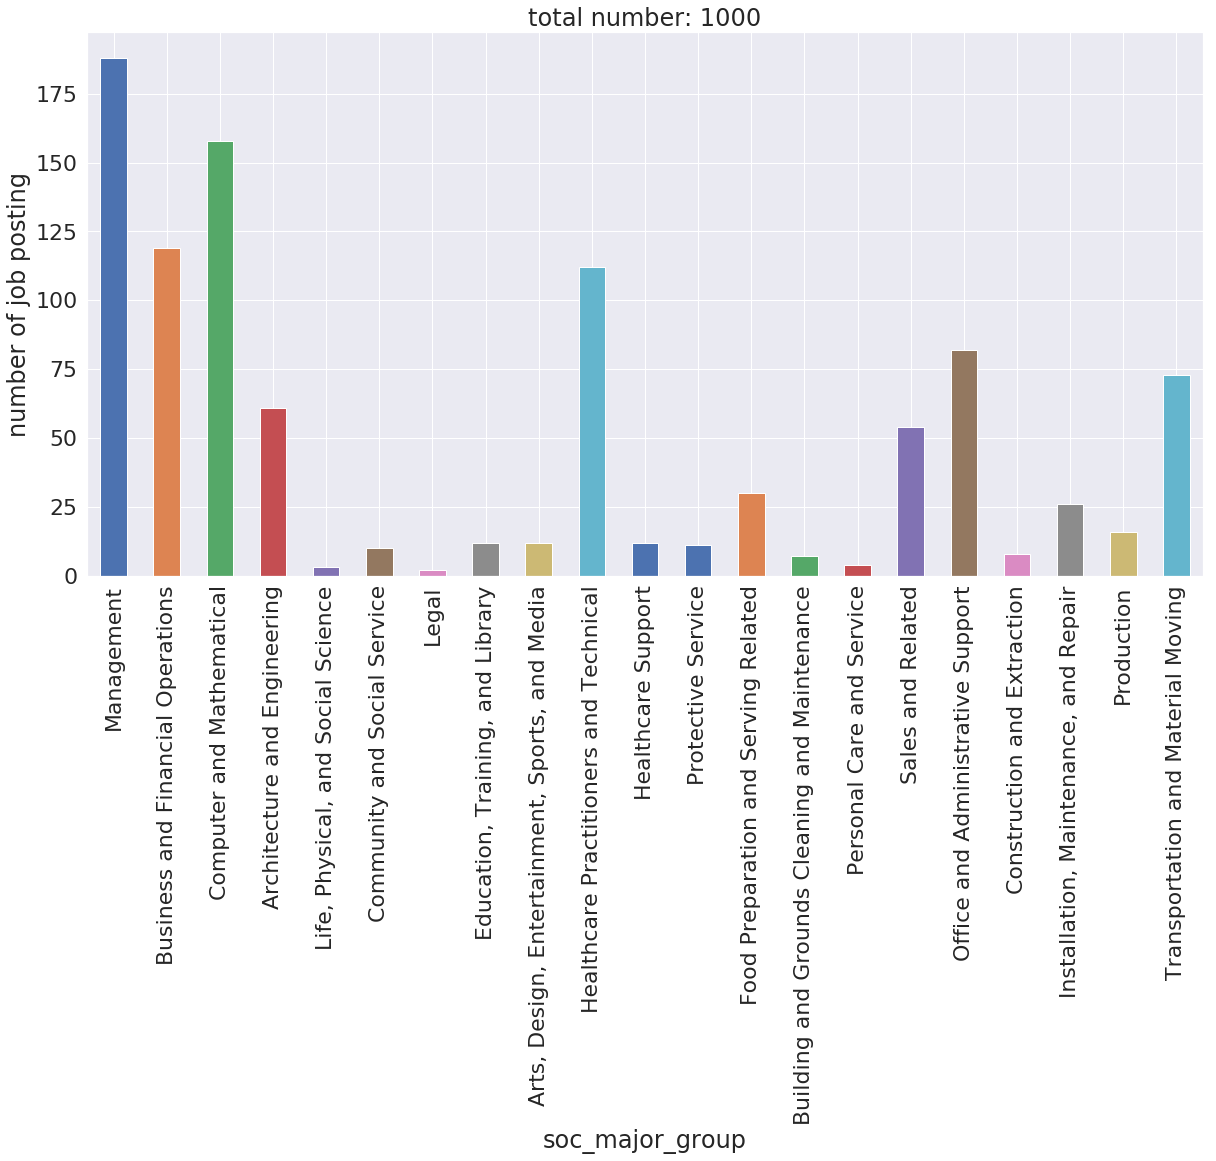

In [20]:
plot_major_group_distribution(sampler)

Something wrong happened! We are missing `Military Occupations`! Because military job postings are extremely rare in the original dataset, simple ramdom sampling might result in lack of classes.

## Weighted Reservoir Sampling

- How would you sample from a weighted distribution where each element has a given weight associated with it in the stream?

- For certain task, we need some curated sample. For example, if we want to build a occupation classifier, we want similar amounts of job posting for each occupation. 

Now we want to have a more uniform distributed sample across all major groups. 
Here we need to provide a weight dictionary in the `JobSampler`

In [21]:
c = Counter()
for job in jobpostings_filtered:
    c.update([job['onet_soc_code'][:2]])
weights = dict()
for key, value in c.items():
    weights[key] = max(c.values()) / value

In [22]:
weights

{'11': 1.0,
 '15': 1.2845014807502468,
 '17': 3.3588022715539494,
 '29': 1.8874383521903104,
 '41': 4.597879858657244,
 '43': 2.521705426356589,
 '13': 1.6824411688647531,
 '49': 7.819711538461538,
 '33': 13.442148760330578,
 '27': 10.879598662207357,
 '47': 33.19387755102041,
 '51': 14.71945701357466,
 '35': 8.214646464646465,
 '25': 9.581737849779087,
 '31': 13.17004048582996,
 '19': 33.885416666666664,
 '21': 23.070921985815602,
 '37': 34.423280423280424,
 '53': 2.3901542983100663,
 '39': 67.0721649484536,
 '23': 69.2127659574468,
 '55': 3253.0}

In [23]:
sampler = JobSampler(job_posting_generator=jobpostings_filtered, k=1000, key=lambda x: x['onet_soc_code'][:2], weights=weights)

Management                                        41
Business and Financial Operations                 51
Computer and Mathematical                         49
Architecture and Engineering                      55
Life, Physical, and Social Science                49
Community and Social Service                      42
Legal                                             39
Education, Training, and Library                  56
Arts, Design, Entertainment, Sports, and Media    54
Healthcare Practitioners and Technical            55
Healthcare Support                                45
Protective Service                                57
Food Preparation and Serving Related              52
Building and Grounds Cleaning and Maintenance     44
Personal Care and Service                         37
Sales and Related                                 48
Office and Administrative Support                 48
Construction and Extraction                       38
Installation, Maintenance, and Repair         

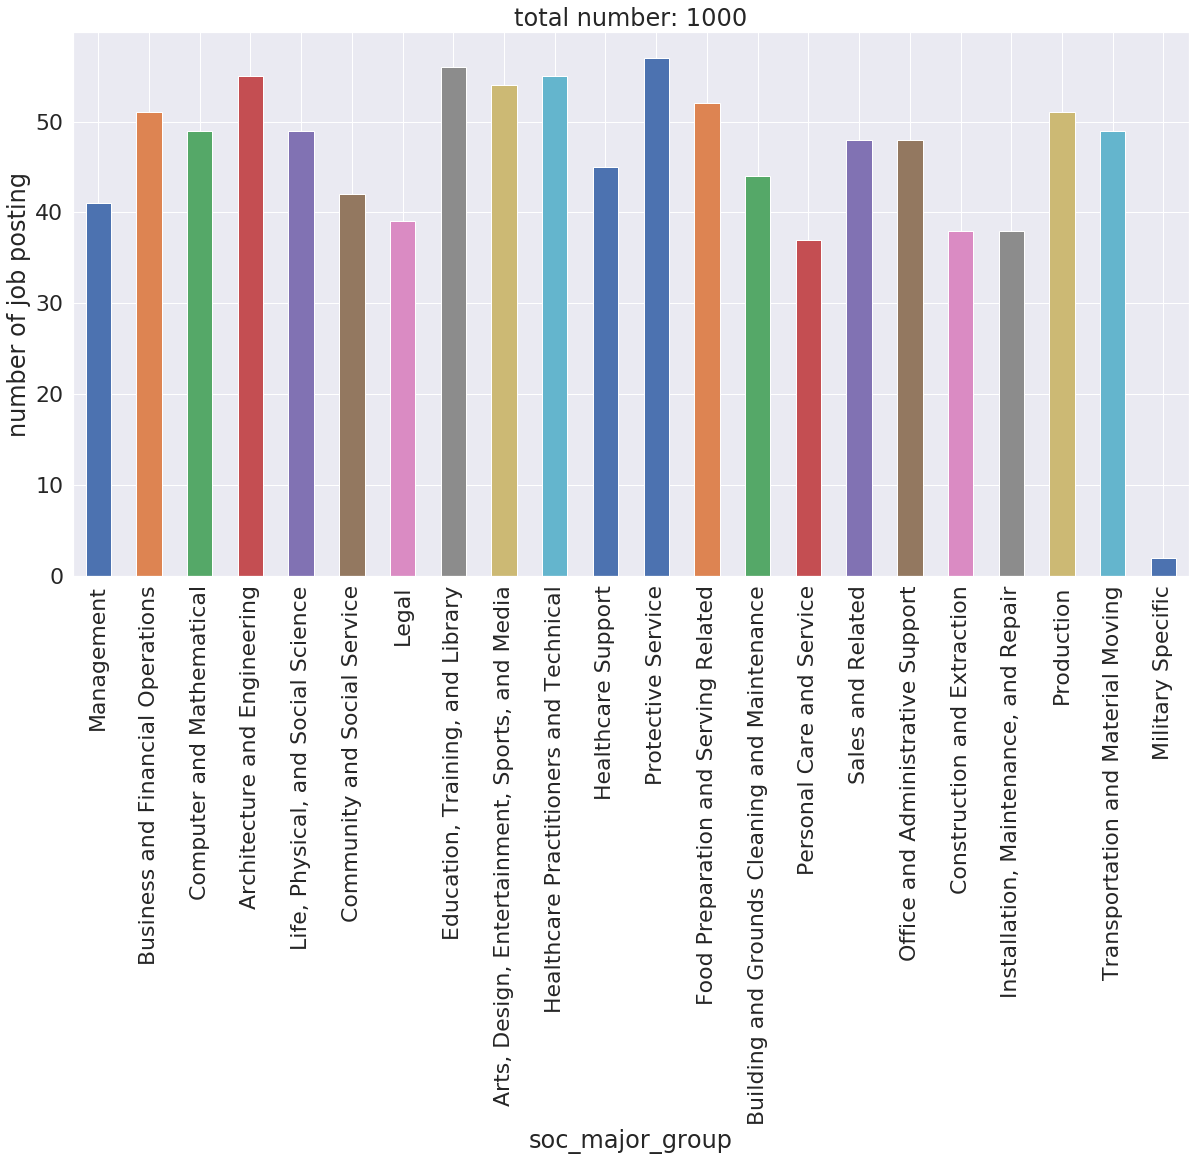

In [24]:
plot_major_group_distribution(sampler)

# Skill Extraction

A common task is extracting competencies from unstructured text. Sometimes this is ontology-based (finding concepts from a known ontology in text), but this is not necessarily true. Skills-ML unites these with a common interface in the SkillExtractor class. The common interface is that every SkillExtractor needs to be able to take in a collection of documents, and yield what we call `CandidateSkill` objects.

## What Is a CandidateSkill?

A CandidateSkill is a possible occurrence of a skill/competency in context in some document. It consists of the following fields:

`skill_name` - The text version of the skill as it appears in the document

`matched_skill_identifier` - A reference to the skill in some ontology. This may be empty, if no ontology was used to search for skills.

`context` - The text surrounding the skill in the document. The goal is for a human labeler to be able to use this to determine whether or not the occurrence represents a true skill. How much context is included is up to the algorithm.

`start_index` - The start index of the skill occurrence within the document string.

`confidence` - The confidence level the algorithm has in this candidate skill being a true occurrence of a skill. This may be empty, if the algorithm has now way of producing a confidence value.

`document_id` - A unique identifier for the source document.

`document_type` - The type of document (examples: Job Posting, Profile, Course Description)

`source_object` - The entire source document.

`skill_extractor_name` - The name of the skill extractor algorithm. Every SkillExtractor subclass defines a name property that is used to give processes downstream context about how their output data was produced.

The idea behind the CandidateSkill object is to serve as a common interface between SkillExtractor objects, automatic evaluation methods, and manual evaluation methods.

- A labeling interface might intake CandidateSkill objects for humans to say yes/no to.
- Another type of labeling interface might involve the export of CandidateSkill objects based on what a human highlighted in the interface when shown the entire document
- Unsupervised evaluation metrics may take in one set of CandidateSkills to produce simple descriptive metrics
- Supervised evaluation metrics may take in one set of CandidateSkills from a SkillExtractor and another set of CandidateSkills from a human labeling interface and use the latter to evaluate the former

We'll talk about some of these use cases in more detail later. But for now, let's start with a simple example that uses NLP rules and isn't tied to an ontology. Let's define a method for extracting skills as 'all noun phrases that end in the word skill or skills'. This is a simple method that realistically won't cover all possible occurrences of skills, but this is a start.

In [25]:
from skills_ml.algorithms.skill_extractors import SkillEndingPatternExtractor
from skills_ml.job_postings.common_schema import JobPostingCollectionSample
job_posting_generator = JobPostingCollectionSample()
# instantiate the skill extractor. This class defaults to only considering lines that
# start with a bullet, which doesn't work for this dataset. So we set this flag to False.
skill_extractor = SkillEndingPatternExtractor(only_bulleted_lines=False)
job_posting = next(iter(job_posting_generator))
for candidate_skill in skill_extractor.candidate_skills(job_posting):
    print('skill name:', candidate_skill.skill_name)
    print('context:', candidate_skill.context)
    print('')

skill name: communication skills
context: Excellent client presentation and communication skills as well as strong customer service and organizational skills.

skill name: organizational skills
context: Excellent client presentation and communication skills as well as strong customer service and organizational skills.

skill name: communication skills
context: We are proud to be an equal opportunity employer College degree preferred, 2 - 5 years experience in print and / or online advertising sales and be able to show consistent sales results in previous positions, Knowledge of the IT industry is preferred, Track record of creativity in sales approaches and solutions, Track record of successfully meeting and exceeding sales goals in media sales relevant to 1105 Medias line of business, Excellent client presentation and communication skills as well as strong customer service and organizational skills, The ideal candidate is energetic, self - motivated, team - oriented, and customer - ce

The results for one job posting are modest. Two distinct skill names, each occurring two different times in the document.  This is a start.

Now let's try another skill extractor: matching with ONET data.

In [26]:
from skills_ml.algorithms.skill_extractors import ExactMatchSkillExtractor
skill_extractor = ExactMatchSkillExtractor(onet.competency_framework)
for candidate_skill in skill_extractor.candidate_skills(job_posting):
    print('skill name:', candidate_skill.skill_name)
    print('context:', candidate_skill.context)
    print('')

skill name: self
context: The ideal candidate is energetic, self-motivated, team-oriented, and customer-centric.

skill name: self
context: We are proud to be an equal opportunity employer College degree preferred, 2-5 years experience in print and/or online advertising sales and be able to show consistent sales results in previous positions, Knowledge of the IT industry is preferred, Track record of creativity in sales approaches and solutions, Track record of successfully meeting and exceeding sales goals in media sales relevant to 1105 Medias line of business, Excellent client  presentation and communication skills as well as strong customer service and organizational skills, The ideal candidate is energetic, self-motivated, team-oriented, and customer-centric, Understanding of how to research potential customers and use online analytics from a sales perspective, Weekly local travel to meet with clients/prospects is required, Minimal non local travel a few times a year is required



Yikes. What is this? As it turns out, ['Self' is a real programming language](https://en.wikipedia.org/wiki/Self_(programming_language)). But it's not applicable here. Simply searching for skill names has its limitations.

To help with this, there is also the SocScopedExactMatchSkillExtractor. This does exact matching, but only for the occupation that the document is tagged with. This, of course, is only applicable if the document has one. And it needs a full CompetencyOntology to work.

In [27]:
from skills_ml.algorithms.skill_extractors import SocScopedExactMatchSkillExtractor
skill_extractor = SocScopedExactMatchSkillExtractor(onet)
for candidate_skill in skill_extractor.candidate_skills(job_posting):
    print('skill name:', candidate_skill.skill_name)
    print('context:', candidate_skill.context)
    print('')

No results. This is expected: For an occupation that is not related to computer programming, the language 'Self' is likely irrelevant.

Here's a list of all the other skill extractors available.

`FuzzyMatchSkillExtractor` - Similar to the ExactMatchSkillExtractor, but using a configurable edit distance to find skill names that are very close to the targets.

`AbilityEndingPatternExtractor` - Similar to the SkillEndingPatternExtractor, but finding noun phrases that end in 'ability' or 'abilities'.

`SectionExtractSkillExtractor` - Attempts to divide the text into sections with headers, which is a common pattern found in job postings. Return each individual sentence found in sections with certain headers (Skills, Competencies, Qualifications).

### Evaluating Skill Extractors

We want to be able to evaluate skill extractors. We may or may not have labeled skills but do want to be able to generate descriptive metrics either way.

In [28]:
from skills_ml.evaluation.skill_extraction_metrics import TotalOccurrences, TotalVocabularySize, OntologyCompetencyRecall

metrics = [
    TotalOccurrences(),
    TotalVocabularySize(),
    OntologyCompetencyRecall(onet)
]
exact_match_skill_extractor = ExactMatchSkillExtractor(onet.competency_framework) 
for metric in metrics:
    candidate_skills = []
    for job_posting in job_posting_generator:
        candidate_skills += list(exact_match_skill_extractor.candidate_skills(job_posting))
    
    print('metric:', metric.name, 'value:', metric.eval(candidate_skills, 50)) 

metric: total_candidate_skills value: 153
metric: total_vocabulary_size value: 40
metric: onet_ksat_competency_recall value: 0.001248868213181804


# Embedding

- Labor market data tends to be large in scale, but represented as raw text. Consequently, an important early step for most tasks is to transform texts into a mathematical form that can be used in the downstream tasks.

- In the context of skills and jobs, an embedding model trained on large amount of job posting data is able to map a skill or a job title into a high dimensional space as well as preserving the contextual and semantic relationship. Ideally, a good embedding model will cluster similar skills and jobs.

## Embedding Models

Many word embedding techniques have been developed since the most impactful embedding algorithm word2vec was published in 2013. Currently, Skills-ML includes word2vec, doc2vec and fastext and may include more in the future.

- `Word2VecModel` is able to look up a word vector and infer a sentence/paragraph vector by averaging each word in a sentence/paragraph. It supports online learning. For out-of-vocabulary word handling of sentence/paragraph inference, a random vector will be assigned with the same dimension.
- `Doc2VecModel` is able to look up a word vector and infer a sentence/paragraph vector by gradient descending on the fly, so it is non-deterministic. It does not support online learning. 
- `FastTextModel` is able to look up a word vector and infer a sentence/paragraph vector by averaging each word in a sentence/paragraph. It supports online learning. For out-of-vocabulary word handling of sentence/paragraph inference, it sums all vectors of the unseen word’s char-ngrams. If none of the char-ngrams of the unseen word is present, a random vector will be assigned with the same dimension.

In [29]:
from skills_ml.algorithms.embedding.models import Word2VecModel, FastTextModel

cbow = Word2VecModel(size=200, sg=0, window=7, iter=3, batch_words=1000)
skip_gram = Word2VecModel(size=200, sg=1, window=7, iter=3, batch_words=1000)
fasttext = FastTextModel(size=200, window=7, iter=3, batch_words=1000) 

## Corpora

Next, we need some text corpus to train embedding modelss. `Skills-ML` provides pre-defined classes to convert common schema job listings into a corpus in documnet level suitable for use by machine learning algorithms or specific tasks.

- `Word2VecGensimCorpusCreator`
- `Doc2VecGensimCorpusCreator`


In [30]:
from skills_ml.job_postings.corpora import Word2VecGensimCorpusCreator, Doc2VecGensimCorpusCreator
sampler = JobSampler(job_posting_generator=jobpostings_filtered, k=5000, key=lambda x: x['onet_soc_code'][:2], weights=weights)
w2v_corpus_generator = Word2VecGensimCorpusCreator(sampler)

## Preprocessing

Or we can build our own corpus generator by using some preprocessing tools

Function Compostition
- `ProcessingPipeline` will compose processing functions together to become a callable object that takes in the input from the very first processing function and returns the output of the last processing function.
- `IterablePipeline` will compose processing functions together to be passed to different stages(training/          prediction)

In [31]:
from skills_ml.algorithms.preprocessing import IterablePipeline
from skills_ml.algorithms import nlp
from functools import partial

document_schema_fields = ['description','experienceRequirements', 'qualifications', 'skills']

pipeline = IterablePipeline(
    partial(nlp.fields_join, document_schema_fields=document_schema_fields),
    nlp.clean_html,
    nlp.clean_str,
    nlp.word_tokenize,
)

corpus_generator = pipeline(sampler)

## Train Embedding

The `EmbeddingTrainer` provides online batch learning for Word2VecModel and FastTextModel. 

In [32]:
from skills_ml.algorithms.embedding.train import EmbeddingTrainer


trainer = EmbeddingTrainer(cbow, skip_gram, fasttext, batch_size=100)
trainer.train(corpus_generator)

## Storage
`Skills-ML` has couple useful storage classes that could benefit both local or cloud. 
- `S3Store`: S3 storage engine
- `FSStore`: File system storage engine
- `ModelStorage`: Serialization model storage. 

In [33]:
from skills_ml.storage import FSStore, S3Store, ModelStorage

fs = FSStore(path="tmp/model_cache/embedding/examples")
trainer.save_model(storage=fs)

In [34]:
print(cbow.model_name)
print(cbow.storage)

word2vec_9d094b1f6b2610e530e14e5a71884be3.model
FSStore(path=tmp/model_cache/embedding/examples)


## Examples

In [35]:
for c, s in zip(cbow.wv.most_similar(['engineer']), skip_gram.wv.most_similar(['engineer'])):
    print(c, s)

('developer', 0.8033339977264404) ('sr', 0.623277485370636)
('sr', 0.7680195569992065) ('architect', 0.5734556317329407)
('analyst', 0.724011242389679) ('developer', 0.5714775919914246)
('designer', 0.7087661027908325) ('writer', 0.5478475093841553)
('architect', 0.6725302934646606) ('soc', 0.5414971709251404)
('mclean', 0.6457548141479492) ('herndon', 0.5357624292373657)
('embedded', 0.6317166090011597) ('tester', 0.532582700252533)
('inc', 0.6310484409332275) ('isso', 0.5319244861602783)
('scientist', 0.62971031665802) ('analyst', 0.5278465747833252)
('springfield', 0.6180558800697327) ('editor', 0.5252323746681213)


/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [36]:
for c, s in zip(cbow.wv.most_similar(['python']), skip_gram.wv.most_similar(['python'])):
    print(c, s)

('scripting', 0.9461991190910339) ('ruby', 0.9052647948265076)
('java', 0.9233536720275879) ('perl', 0.8700193762779236)
('ruby', 0.9213511943817139) ('js', 0.8653509616851807)
('unix', 0.9152072668075562) ('selenium', 0.8345634937286377)
('languages', 0.9030321836471558) ('git', 0.8201907277107239)
('javascript', 0.8950035572052002) ('subversion', 0.8199359774589539)
('linux', 0.8872419595718384) ('javascript', 0.8152703046798706)
('programming', 0.8679823875427246) ('scripting', 0.8112311363220215)
('sql', 0.8587027788162231) ('unix', 0.8111978769302368)
('perl', 0.8509498238563538) ('languages', 0.8040737509727478)


In [37]:
for c, s in zip(cbow.wv.most_similar(['cnc']), skip_gram.wv.most_similar(['cnc'])):
    print(c, s)

('machine', 0.7754281759262085) ('hws', 0.7544339895248413)
('machines', 0.730404257774353) ('fabrication', 0.743915319442749)
('circuits', 0.7134151458740234) ('machining', 0.7412827014923096)
('hydraulic', 0.7047945857048035) ('controllers', 0.7408922910690308)
('machining', 0.7047876715660095) ('turbines', 0.734102725982666)
('pumps', 0.6980614066123962) ('overhauling', 0.7285677194595337)
('metal', 0.6945027112960815) ('rebuilding', 0.7274059057235718)
('electric', 0.6921502351760864) ('bearings', 0.7227500677108765)
('assemblies', 0.6852962970733643) ('turbine', 0.7216542959213257)
('machinery', 0.67722487449646) ('harpoon', 0.7176830172538757)


Skills-ML also provides a function to visualize the embedding in tensorboard

In [50]:
from skills_ml.algorithms.embedding.models import visualize_in_tensorboard
visualize_in_tensorboard(cbow)

Run `tensorboard --logdir=/home/ubuntu/skills-ml/word2vec_9d094b1f6b2610e530e14e5a71884be3 --host 127.0.0.1` to run visualize result on tensorboard


## Evaluation

Although there is an emerging trend towards generating embeddings for structured and unstructured data, there is not yet any systematic suite for measuring the quality of embeddings.
We generally follow one of the few works in embedding evaluation [Concept2vec: Metrics for Evaluating Quality of Embeddings for Ontological Concepts] to create metrics for evaluating embedding against the gold standard ontology dataset. The gold standard ontology is curated by domain experts like O*NET, so a good embedding should replicate the structure of the entities in the gold standard taxonomy. In other words, it is useful to see how an embedding reflects the clustering structure.

One trivial clustering is Major Groups of occupations. A good embedding should cluster the occupations which belong to the same major groups.

- `CategorizationMetric`: The cosine similarity between the embedding of the concept and the mean vector of embeddings of all the entities within that concept cluster. This metric aligns a clustering of entities into different categories, reflecting how well the embedding of a concept cluster performs as the background concept of the entities typed by it. 

- `IntraClusterCohesion`: The sum of squared error of the embedding of the centroid of the concept cluster and the embedding of each entities within that cluster. It measures how near the data points in a cluster are to the cluster centroid.

- `MajorGroupRecall`: For a major group, calculate the cosine similarity against all the occupations and find the top n closest occupations. The recall is defined as the number of true positives from top n closest occupations divided by the total number of occupation within the major group.

- `MajorGroupPrecision`: Similarly to MajorGroupRecall which is called Coherence Score in the paper, start by finding the top n closest occupations. The precision is defined as the number of true positives from top n closest occupations divided by n

In [38]:
from skills_ml.ontologies.onet import Onet

major_group_occupation_des_clustering = onet.major_group_occupation_description_clustering

In [39]:
from skills_ml.evaluation.embedding_metrics import metrics_for_embedding, CategorizationMetric, IntraClusterCohesion, RecallTopN, PrecisionTopN
from skills_ml.algorithms.preprocessing import ProcessingPipeline

def vectorization(embedding):
    p = ProcessingPipeline(
        nlp.normalize,
        nlp.clean_str,
        nlp.word_tokenize,
        partial(nlp.vectorize, embedding_model=embedding)
    )
    return p

categorization_metric = CategorizationMetric(major_group_occupation_des_clustering)
intra_cohesion = IntraClusterCohesion(major_group_occupation_des_clustering)
recall_top = RecallTopN(major_group_occupation_des_clustering, topn=10)
precision_top = PrecisionTopN(major_group_occupation_des_clustering, topn=10)

In [40]:
categorization_metric.eval(vectorization(fasttext))

{'Life, Physical, and Social Science': 0.544181802616692,
 'Education, Training, and Library': 0.39010462667236234,
 'Legal': 0.44299323639279864,
 'Protective Service': 0.8338733121787928,
 'Personal Care and Service': 0.5520270184970673,
 'Military Specific': 0.8403838778749896,
 'Arts, Design, Entertainment, Sports, and Media': 0.41337371196897577,
 'Business and Financial Operations': 0.33068055201077906,
 'Installation, Maintenance, and Repair': 0.18600172293592943,
 'Community and Social Service': 0.3938874349835806,
 'Food Preparation and Serving Related': 0.2854292068104062,
 'Farming, Fishing, and Forestry': 0.49009970825435945,
 'Management': 0.6667720141362156,
 'Architecture and Engineering': 0.31587733273288865,
 'Transportation and Material Moving': 0.3438685579518763,
 'Healthcare Practitioners and Technical': 0.3313605878282969,
 'Production': 0.7619768121213049,
 'Computer and Mathematical': 0.2723307384580105,
 'Sales and Related': 0.29548456080419716,
 'Office and Ad

In [41]:
import statistics
import operator
from collections import defaultdict

# We define some helper functions to evaluate multiple embeddings
def algorithm_name(emb):
    if emb.model_type == 'word2vec' or emb.model_type == 'fasttext':
        if getattr(emb, 'sg', None) == 1:
            return 'Skip-Gram'
        else:
            return 'Continuous Bag of Words'
        
    elif emb.model_type == 'doc2vec':
        if getattr(emb, 'dm', None) == 1:
            return 'Distributed Memory'
        else:
            return 'Distributed Bag of Words'


def evaluate_multiple_embeddings(embeddings, vectorization, metric):
    result = defaultdict(dict)
    for emb in embeddings:
        c = metric.eval(vectorization(emb))
        name = emb.model_name.split('.')[0]
        result[name]['mean'] = statistics.mean(list(c.values()))
        result[name]['variance'] = statistics.variance(list(c.values()))
        result[name]['std'] = statistics.stdev(list(c.values()))
        result[name]['max'] = max(c.items(), key=operator.itemgetter(1))[1]
        result[name]['max_cluster'] = max(c.items(), key=operator.itemgetter(1))[0]
        result[name]['min'] = min(c.items(), key=operator.itemgetter(1))[1]
        result[name]['min_cluster'] = min(c.items(), key=operator.itemgetter(1))[0]
        result[name]['type'] = emb.model_type
        result[name]['algorithm'] = algorithm_name(emb)
        result[name]['window'] = emb.window
    
    return pd.DataFrame(result)

In [42]:
evaluate_multiple_embeddings([cbow, skip_gram, fasttext], vectorization, categorization_metric)

,word2vec_9d094b1f6b2610e530e14e5a71884be3,word2vec_b6aebc90db420cbb071d7e78e3158e51,fasttext_7d92bf3d9781f057978d909bed7e7f04
algorithm,Continuous Bag of Words,Skip-Gram,Continuous Bag of Words
max,0.923396,0.64388,0.922388
max_cluster,Healthcare Support,Production,Healthcare Support
mean,0.49752,0.34426,0.478505
min,0.161117,0.181937,0.186002
min_cluster,"Installation, Maintenance, and Repair",Food Preparation and Serving Related,"Installation, Maintenance, and Repair"
std,0.221347,0.122163,0.204855
type,word2vec,word2vec,fasttext
variance,0.0489945,0.0149237,0.0419656
window,7,7,7


# Occupation Classification

A common issue with job posting data is incomplete, incorrect, and inconsistent occupation classification. The majority of job postings in the US are using the O*NET SOC classification system, but many are either missing or poorly classified. This can be improved by using machine learning.

## SOC Codes
Most of the job posting data collected are aligned with the O*NET SOC system. The occupations in the SOC are classified at four levels of aggregation: major group, minor group, broad occupation, and detailed occupation. Each lower level of detail identifies a more specific group of occupations. Each item in the SOC is designated by a six-digit code. The first two digits represent the major group, the third digit represents the minor group, the fourth and fifth digits represent the broad occupation, and the sixth digit represents the detailed occupation.
- Major group codes end with 0000 (e.g., 29-0000 Healthcare Practitioners and Technical
Occupations —the exceptions are minor groups 15-1200 Computer Occupations, 31- 1100 Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides, and 51-5100 Printing Workers, which end with 00). 
- Minor groups generally end with 000 (e.g., 29-1000 Health Diagnosing or Treating Practitioners).
- Broad occupations end with 0 (e.g., 29-1020 Dentists).
- Detailed occupations end with a number other than 0 (e.g., 29-1022 Oral and Maxillofacial Surgeons).


## Target Variable

- `FullSOC`
- `SOCMajorGroup`

In [43]:
from skills_ml.algorithms.occupation_classifiers import FullSOC, SOCMajorGroup

full_soc = FullSOC(onet_cache=onet)

## Design Matrix

The classification task consists of inferring a SOC code from a job posting and is accomplished through several stages: preprocessing, filtering, training and testing. `DesignMatrix` helps users accomplish this task.

    

In [44]:
import random
from itertools import islice
from skills_ml.utils import itershuffle
from skills_ml.algorithms.occupation_classifiers import DesignMatrix

            
sample = JobSampler(job_posting_generator=jobpostings_filtered, k=5000, key=lambda x: x['onet_soc_code'][:2], weights=weights)
    
dataset = itershuffle(sample)
train = islice(dataset, 0, 4000)
test = islice(dataset, 4000)
            
            
pipe_x = IterablePipeline(
    partial(nlp.fields_join, document_schema_fields=document_schema_fields),
    nlp.clean_str,
    nlp.word_tokenize,
    partial(nlp.vectorize, embedding_model=fasttext)
)

pipe_y = IterablePipeline(
    full_soc.transformer
)        
    

matrix = DesignMatrix(
    train, 
    full_soc,
    pipe_x,
    pipe_y,
)


## OccupationClassifierTrainer
`OccupationClassifierTrainer` trains classifiers with cross validation and picks the best classifier with a grid search based on the metric. It takes in a dictionary for the grid search.

In [45]:
from skills_ml.algorithms.occupation_classifiers.train import OccupationClassifierTrainer

grid_config = {
                 'sklearn.ensemble.ExtraTreesClassifier': {
                     'n_estimators': [50, 100],
                     'criterion': ['entropy', 'gini'],
                     'max_depth': [20],
                     'max_features': ['log2'],
                     'min_samples_split': [10]
                      },
                 'sklearn.neural_network.MLPClassifier': {
                    'hidden_layer_sizes': [100, 500],
                     'activation': ['logistic', 'relu'],
                     'solver': ['adam']
                     },
                 }

cls_trainer = OccupationClassifierTrainer(
    matrix=matrix,
    k_folds=3,
    grid_config=grid_config,
    storage=FSStore('tmp/model_cache/soc_classifiers/examples'),
    n_jobs=4)

In [46]:
cls_trainer.train(save=False)

/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-p

In [47]:
cls_trainer.best_estimators

[<ProxyObjectWithStorage at 0x7f2f1c1bfb48 for GridSearchCV at 0x7f2f19160278>,
 <ProxyObjectWithStorage at 0x7f2f1bfb2eb8 for GridSearchCV at 0x7f2f192ea0b8>]

## Evaluation

Accuracy, recall, precision and f1 are the metrics taken into consideration. Since it is a multi-class classification problem, an overall performance is evaluated by looking at the micro-average and macro-average for the metrics. A macro-average will compute the metric independently for each class and then take the average, whereas a micro-average will aggregate the contributions of all classes and then computes the average. In other words, a macro-average is treating all classes equally. 

In [48]:
from skills_ml.algorithms.occupation_classifiers.test import OccupationClassifierTester
from skills_ml.evaluation.occ_cls_evaluator import OnetOccupationClassificationEvaluator
from skills_ml.algorithms.occupation_classifiers.classifiers import CombinedClassifier
from skills_ml.algorithms.embedding.train import Reiterable

steps = [
    partial(nlp.fields_join, document_schema_fields=document_schema_fields),
    nlp.normalize,
    nlp.clean_str,
    nlp.word_tokenize,
]

evaluators = []
test_data = list(test)
for cls in cls_trainer.best_estimators:
    tester = OccupationClassifierTester(
        test_data_generator=test_data, 
        preprocessing=steps, 
        classifier=CombinedClassifier(fasttext, cls)
    )
    evaluators.append(OnetOccupationClassificationEvaluator(tester))


/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: generator 'itershuffle' raised StopIteration
  


In [49]:
for e, c in zip(evaluators, cls_trainer.best_estimators):
    print(c.best_estimator_)
    print('accuracy: ', e.accuracy)
    print('precision: ', e.precision)
    print('f1: ', e.f1)
    print('major group: ', e.accuracy_major_group)
    print('macro precision: ', e.macro_precision)
    print('micro precision: ', e.micro_precision)
    print('recall: ', e.recall)
    print('macro recall: ', e.macro_recall)
    print('micro recall: ', e.micro_recall)
    print('macro f1: ', e.macro_f1)
    print('micro f1: ', e.micro_f1)
    print('\n')

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=20, max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
accuracy:  0.483
precision:  [0.09090909 0.         0.07894737 ... 0.         0.         0.        ]
f1:  [0.15384615 0.         0.12244898 ... 0.         0.         0.        ]
major group:  0.547
macro precision:  0.3822259316025384
micro precision:  0.483
recall:  [0.5        0.         0.27272727 ... 0.         0.         0.        ]
macro recall:  0.3180345574223314
micro recall:  0.483
macro f1:  0.3258889572669588
micro f1:  0.483


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_lay

/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/.pyenv/versions/3.6.5/envs/env3.6.5/lib/python3.6/site-packages/sklearn/metrics/classification